In [46]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [26]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [27]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [28]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(10)
])

In [29]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.07593609,  0.9582114 ,  0.0437273 , -0.42181128, -0.25684962,
        -0.00620095, -0.19445845,  0.08509639, -0.0516078 , -0.17624626]],
      dtype=float32)

In [30]:
tf.nn.softmax(predictions).numpy()

array([[0.0994006 , 0.24019077, 0.09625003, 0.06042547, 0.07126266,
        0.09156244, 0.07585044, 0.10031532, 0.08749785, 0.07724451]],
      dtype=float32)

In [31]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()

2.3907342

In [32]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4772 - accuracy: 0.8623

In [33]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0710 - accuracy: 0.9776


[0.07100608199834824, 0.9775999784469604]

In [34]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [55]:
show_index = 4
probs = probability_model(x_test[show_index:show_index+1])

Neural net prediction: 4
Actual: 4


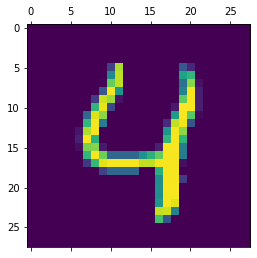

In [56]:
index_min = np.argmax(probs)
print(f'Neural net prediction: {index_min}')
print(f'Actual: {y_test[show_index]}')
plt.matshow(x_test[show_index])